In [29]:
import gensim
from sklearn.decomposition import TruncatedSVD
from scipy.spatial.distance import cosine

def find_best_k(word2vec_model, analogies, k_start, k_end):
    best_k = 0
    max_correct = 0
    
    for k in range(k_start, k_end+1):
        #print(k, "-------------")
        svd = TruncatedSVD(n_components=k)
        reduced_vectors = svd.fit_transform(word2vec_model.vectors)
        
        correct = 0
        for analogy in analogies:
            #print(analogy, "-------------")
            word1, word2, word3, expected = analogy
            word1_index = word2vec_model.key_to_index.get(word1, None)
            word2_index = word2vec_model.key_to_index.get(word2, None)
            word3_index = word2vec_model.key_to_index.get(word3, None)
            
            if word1_index is None or word2_index is None or word3_index is None:
                continue
                
            word1_vec = reduced_vectors[word1_index]
            word2_vec = reduced_vectors[word2_index]
            word3_vec = reduced_vectors[word3_index]
            
            word4_vec = word3_vec - word2_vec + word1_vec
            closest_index = cosine_similarity(word4_vec.reshape(1, -1), reduced_vectors).argmax()
            closest_word = word2vec_model.index_to_key[closest_index]
            
            if closest_word == expected:
                correct += 1
        
    
        if correct > max_correct:
            max_correct = correct
            best_k = k
            
    return best_k


In [30]:
import gensim
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [31]:
analogies = [('ATHENS', 'GREECE', 'BANGKOK', 'China'),  ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),   ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND')]
best_k = find_best_k(word2vec_model, analogies, 10, 50)
print(best_k)


0


In [34]:
import torch

batch = [["the", "dog", "sleeps"], ["we", "laughed"], ["it", "rained", "all", "day"]]
word2id = {"<PAD>": 0, "<START>": 1, "<END>": 2, "the":3, "dog":4, "sleeps":5, "we":6, "laughed":7, "it": 8, "rained":9, "all":10, "day":11}

bid = [[word2id[w] for w in s] for s in batch]

mlen = max([len(s) for s in bid])

# pad all sentences
bid = [s + [0] * (mlen - len(s)) for s in bid]

# add <START> and <END> tokens to each sentence
bid = [[1] + s + [2] for s in bid]

btensor = torch.tensor(bid, dtype=torch.long)

In [36]:
btensor

tensor([[ 1,  3,  4,  5,  0,  2],
        [ 1,  6,  7,  0,  0,  2],
        [ 1,  8,  9, 10, 11,  2]])

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

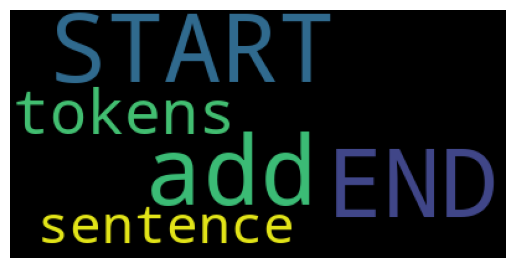

In [6]:
wordcloud = WordCloud().generate("add <START> and <END> tokens to each sentence")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()